In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bisect

### load in data

In [2]:
vh = pd.read_csv('C:\\Users\\Alexander\\My Documents\\tam\\CV_project/data/GH1110_KW1306-control_dense.csv')

In [3]:
np.random.seed(123)

In [4]:
vh = pd.DataFrame.transpose(vh)

In [5]:
vh = vh.iloc[2:]

## toy example

#### set up object; generate vector of row proportions, and cumulative row prop

In [55]:
df = vh.iloc[0:20, 0:21]
#20 genes, 21 cells
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
GNAI3,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
CDC45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APOH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NARF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CAV2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
KLF6,31,0,0,15,0,9,1,3,0,0,...,0,3,5,9,8,0,1,0,0,15
SCMH1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,4,1,0,1,0,0,0
COX5A,15,0,0,4,0,1,0,2,0,0,...,0,6,0,7,6,0,0,0,0,9
TBX2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
rs = df.sum(axis=1)
rs

GNAI3         6
CDC45         0
H19           0
APOH          0
NARF          1
CAV2          6
KLF6        100
SCMH1         7
COX5A        50
TBX2          0
TBX4          0
NGFR          0
WNT9A         0
FER           2
XPO6          4
TFE3          6
AXIN2         0
BRAT1         1
GNA12         0
SLC22A18      2
dtype: int64

In [57]:
tot = rs.sum(axis=0)
tot

185

In [58]:
rsprop = pd.DataFrame(rs/tot, columns=['prop'])
rsprop['cumprop'] = np.cumsum(rsprop)
rsprop

,prop,cumprop
GNAI3,0.032432,0.032432
CDC45,0.000000,0.032432
H19,0.000000,0.032432
APOH,0.000000,0.032432
NARF,0.005405,0.037838
CAV2,0.032432,0.070270
KLF6,0.540541,0.610811
SCMH1,0.037838,0.648649
COX5A,0.270270,0.918919
TBX2,0.000000,0.918919


#### run simulation; 100 numbers per cell for 21 cells

In [12]:
lookup = np.random.uniform(low=0.0, high=1.0, size=100)

In [13]:
bisect.bisect_left(a=list(rsprop['cumprop']), x=lookup[0])

8

In [14]:
rsprop

,prop,cumprop
GNAI3,0.032432,0.032432
CDC45,0.000000,0.032432
H19,0.000000,0.032432
APOH,0.000000,0.032432
NARF,0.005405,0.037838
CAV2,0.032432,0.070270
KLF6,0.540541,0.610811
SCMH1,0.037838,0.648649
COX5A,0.270270,0.918919
TBX2,0.000000,0.918919


In [15]:
zeros = pd.DataFrame().reindex_like(df)
zeros = zeros.fillna(0)

In [16]:
add = bisect.bisect_left(a=list(rsprop['cumprop']), x=lookup[0])

In [17]:
zeros.iloc[bisect.bisect_left(a=list(rsprop['cumprop']), x=lookup[0])] = zeros.iloc[bisect.bisect_left(a=list(rsprop['cumprop']), x=lookup[0])] +1

In [18]:
zeros.iloc[add,0] = zeros.iloc[add, 0] +1

In [19]:
zeros

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
GNAI3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDC45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APOH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NARF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAV2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KLF6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SCMH1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COX5A,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TBX2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
zeros = pd.DataFrame().reindex_like(df)
zeros = zeros.fillna(0)

In [24]:
lookup = np.random.uniform(low=0.0, high=1.0, size=100)
for i in lookup:
    add = bisect.bisect_left(a=list(rsprop['cumprop']), x=i)
    zeros.iloc[add,0] = zeros.iloc[add, 0] +1

In [25]:
zeros

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
GNAI3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDC45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APOH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NARF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAV2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KLF6,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SCMH1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COX5A,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TBX2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


for each value of "lookup" (the 100 random values pulled between [0:1]),
select the row index of the vector of cumulative sums of the proportions corresponding to the bottom of the interval containing the random number,
then add 1 to the zero-ed out dataframe at the corresponding row index.

this only fills in the first column. need to repop whole matrix.

#### now try to fill the whole zero df

In [63]:
zeros = pd.DataFrame().reindex_like(df)
zeros = zeros.fillna(0)

In [61]:
for j in range(0,len(zeros.iloc[0,:])):
    lookup = np.random.uniform(low=0.0, high=1.0, size=100)
    for i in lookup:
        add = bisect.bisect_left(a=list(rsprop['cumprop']), x=i)
        zeros.iloc[add,j] = zeros.iloc[add, j] +1

In [62]:
zeros

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
GNAI3,5.0,1.0,5.0,4.0,5.0,6.0,2.0,4.0,3.0,2.0,...,5.0,5.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,1.0
CDC45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APOH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NARF,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
CAV2,4.0,5.0,3.0,2.0,4.0,5.0,6.0,2.0,4.0,3.0,...,2.0,5.0,5.0,3.0,3.0,3.0,5.0,5.0,4.0,1.0
KLF6,54.0,49.0,58.0,57.0,53.0,47.0,49.0,60.0,55.0,48.0,...,57.0,52.0,56.0,57.0,51.0,63.0,48.0,54.0,52.0,52.0
SCMH1,3.0,3.0,8.0,6.0,7.0,1.0,2.0,6.0,3.0,3.0,...,5.0,1.0,2.0,4.0,4.0,4.0,6.0,4.0,5.0,9.0
COX5A,27.0,35.0,19.0,25.0,19.0,38.0,31.0,20.0,24.0,30.0,...,24.0,26.0,23.0,27.0,27.0,19.0,33.0,28.0,33.0,28.0
TBX2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


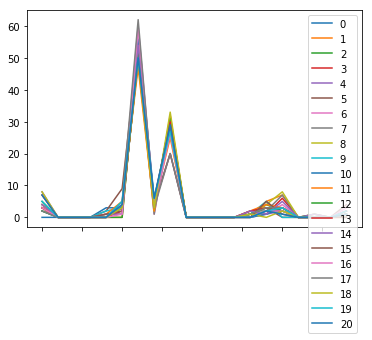

In [38]:
zeros.plot()

for each column, lookup 100 random uniformly distributed numbers between [0-1].
for each number, select the row index of the vector of cumulative sums of the proportions corresponding to the bottom of the interval containing the random number, then add 1 to the zero dataframe at the corresponding row index.

### takeaway from toy example

things to think about:

what does this tell us? what exactly is information we gain from repopulating the matrix like this?
- on its own, i don't think this tells us much; comparing to downsampled data will reveal more info; i believe "downsampling" will involve using fewer than 1 million lookup nums. 750k, 500k, 250k; smaller intervals in between; etc.

The simulated values we get are based on column sums of the original expression matrix, moving toward "whole experiment" sensitivity rather than per-cell sensitivity. does it matter?
- i guess rowsums makes sense to use; we will ultimately be comparing to downsampled data so want to know sensitivity of whole experiment rather than individual cells?

How will we compare to downsampled data?
- how best to summarize the matrix for each iteration of lookup numbers and compare matrix between 1M vs 750k vs 500k etc...


next steps:
- scale up. use on larger/real dataset; select 1 million random "lookup" numbers
- "downsampling" will involve using fewer than 1 million lookup nums. 750k, 500k, 250k; smaller intervals in between; etc
- try out other dists to pull random "lookup" numbers from aside from random normal distribution



one thought: we repop matrix each time based on rowsums, but only with a certain number of lookup numbers. then in each new matrix, we take the new rowsum. compare the rowsums between each downsampling matrix --> comparing sensitivity/total genes detected at different hypothetical sequencing depths.

## now try on full dataset...

#### first setup rowsums, proportion and cumulative prop

In [39]:
vh.head()

,0,1,2,3,4,5,6,7,8,9,...,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394
GNAI3,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,2,0,0,0,0,0
CDC45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APOH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NARF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
rs = vh.sum(axis=1)
tot = rs.sum(axis=0)
rsprop = pd.DataFrame(rs/tot, columns=['prop'])
rsprop['cumprop'] = np.cumsum(rsprop)

#### begin the simulation... start with 100 lookup #s....

In [66]:
zeros = pd.DataFrame().reindex_like(vh)
zeros = zeros.fillna(0)

In [67]:
for j in range(0,len(zeros.iloc[0,:])):
    lookup = np.random.uniform(low=0.0, high=1.0, size=100)
    for i in lookup:
        add = bisect.bisect_left(a=list(rsprop['cumprop']), x=i)
        zeros.iloc[add,j] = zeros.iloc[add, j] +1

took around ~5 mins